# Eyetracking grief - Preprocessing
This script is for preprocessing the first part of the eyetracking grief experiment. 
1. It reads the .tsv ouput files from Eyetribe
2. It preprocesses the participants eye movements 
3. It outputs an .csv (or xsls) file useful for statistical analysis

## Define WD
- check current working directory
- define working directory 

In [1]:
import os
print(os.getcwd())

os.chdir("C:\\Users\\katec\\Documents\\Eyetracking_grief\\Analysis\\Eyetracking")
print(os.getcwd())

C:\Users\katec\Documents\Eyetracking_grief\Analysis\Eyetracking
C:\Users\katec\Documents\Eyetracking_grief\Analysis\Eyetracking


## Read the data
- import necessary package to read & transform the data 
- read the data
- transform it to datamatrix

In [2]:
from datamatrix import io, DataMatrix  #documentation for dm at https://datamatrix.cogsci.nl/0.12/basic/
from datamatrix import operations as ops
from datamatrix import functional as fnc

In [3]:
inputfile = 'data\subject-4.tsv'  #it reads in all participants data
dm = io.readtxt(inputfile, delimiter='\t')

C:\Users\katec\anaconda3\lib\site-packages\datamatrix\py3compat.py:98: UserWarning: Some rows miss column rawx
  warnings.warn(safe_str(msg), *args)
C:\Users\katec\anaconda3\lib\site-packages\datamatrix\py3compat.py:98: UserWarning: Some rows miss column rawy
  warnings.warn(safe_str(msg), *args)
C:\Users\katec\anaconda3\lib\site-packages\datamatrix\py3compat.py:98: UserWarning: Some rows miss column avgx
  warnings.warn(safe_str(msg), *args)
C:\Users\katec\anaconda3\lib\site-packages\datamatrix\py3compat.py:98: UserWarning: Some rows miss column avgy
  warnings.warn(safe_str(msg), *args)
C:\Users\katec\anaconda3\lib\site-packages\datamatrix\py3compat.py:98: UserWarning: Some rows miss column psize
  warnings.warn(safe_str(msg), *args)
C:\Users\katec\anaconda3\lib\site-packages\datamatrix\py3compat.py:98: UserWarning: Some rows miss column Lrawx
  warnings.warn(safe_str(msg), *args)
C:\Users\katec\anaconda3\lib\site-packages\datamatrix\py3compat.py:98: UserWarning: Some rows miss colum

# Parse the data

The data is automatically parsed into a DataMatrix. The only thing that we need
to do is override the parser class so that it starts a phase automatically at
the start of each trial.

 -- *side note: the data must be in a subfolder where the analysis script is* 

In [4]:
from eyetribeparser import parse

dm = parse(trialphase = 'trial')

.......

C:\Users\katec\anaconda3\lib\site-packages\eyelinkparser\_eyelinkparser.py:283: UserWarning: Trial ended while phase "trial" was still ongoing
  % self.current_phase)


.......................

# Recode horizontal eye movements to ROIs

The left side is coded as -1, the right side as 1, anything else as 0.

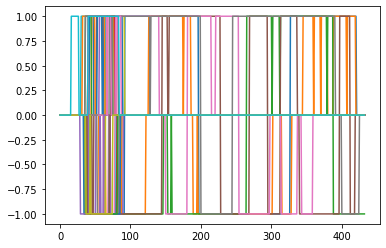

In [5]:
from datamatrix import series as srs
from matplotlib import pyplot as plt

LEFT_BOUNDARY = 312
RIGHT_BOUNDARY = 712
MIN_SAMPLES = 5

dm.roi_left = -1 * srs.threshold(
    dm.xtrace_trial,
    lambda x: x < LEFT_BOUNDARY,
    min_length=MIN_SAMPLES
)

dm.roi_right = srs.threshold(
    dm.xtrace_trial,
    lambda x: x > RIGHT_BOUNDARY,
    min_length=MIN_SAMPLES
)

# plot all fixations during the experiment
dm.roi = dm.roi_left + dm.roi_right    # left represented by -1 & right by +1
for row in dm:
    plt.plot(row.roi)
plt.show()


# First fixation

We want to extract a few parameters from each ROI trace. Time is in sample
units.

- ROI of first fixation
- Time-to-first fixation
- Number of fixations on each ROI
- Total gaze time on each ROI per fixation

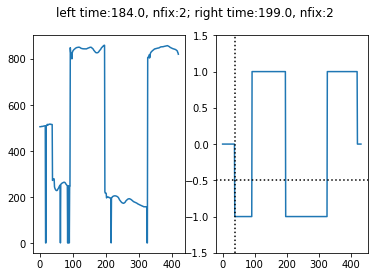

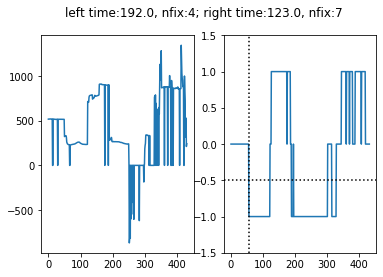

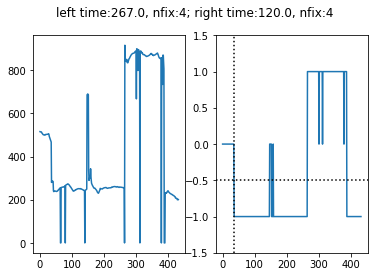

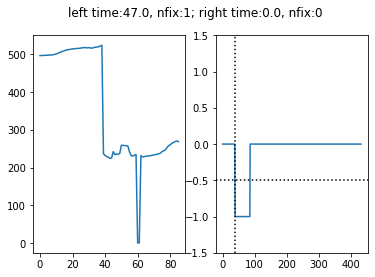

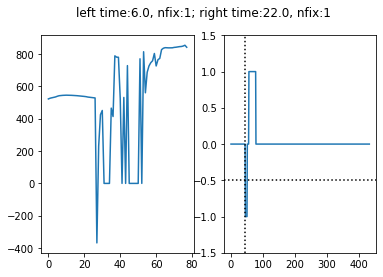

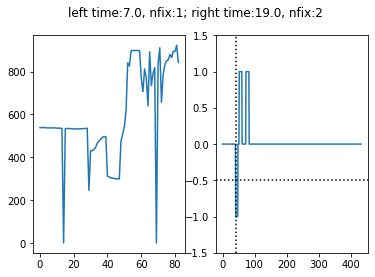

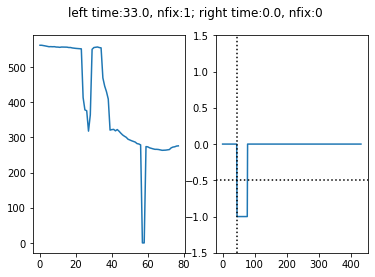

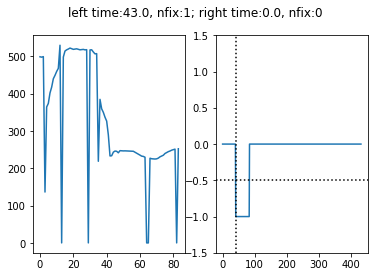

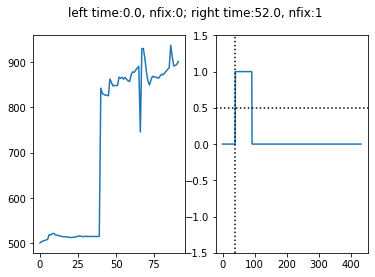

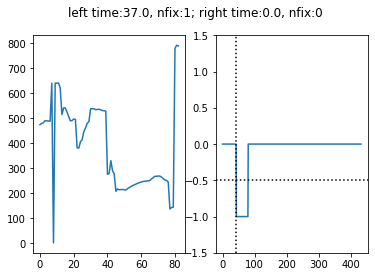

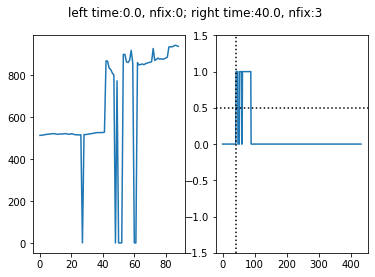

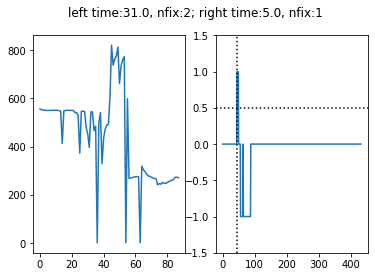

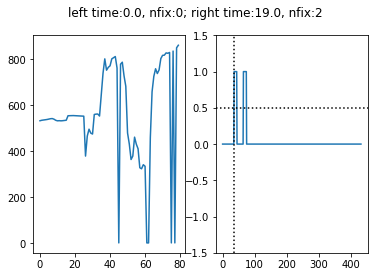

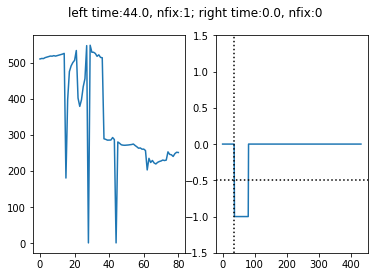

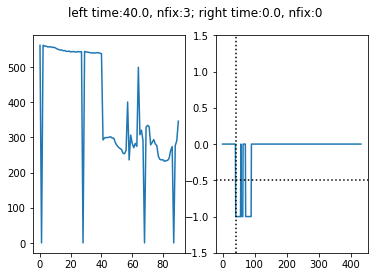

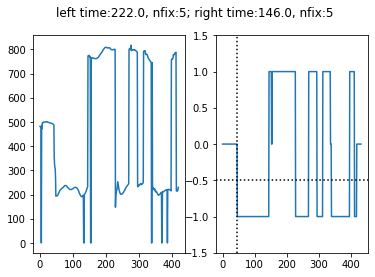

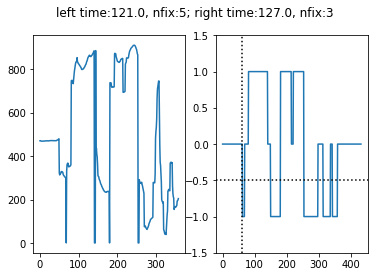

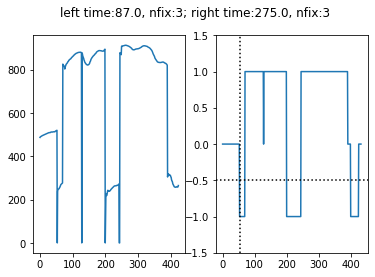

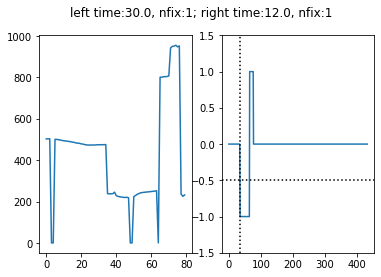

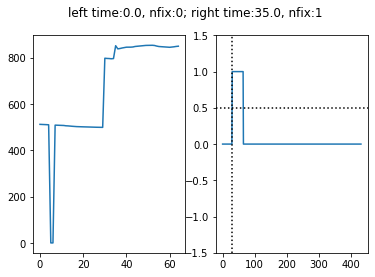

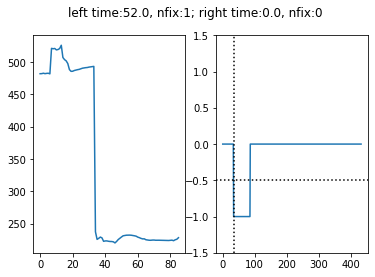

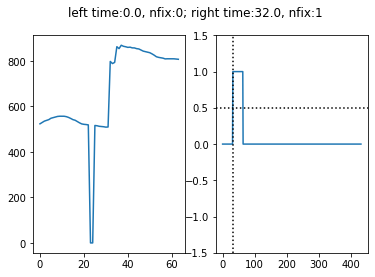

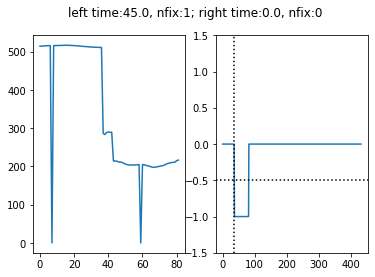

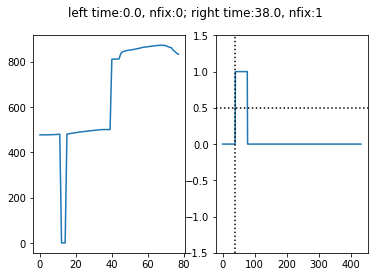

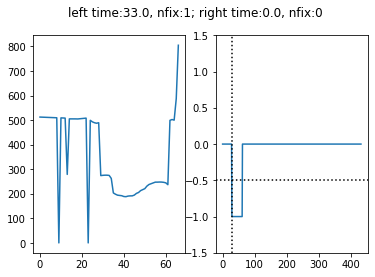

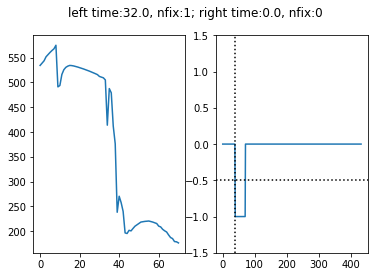

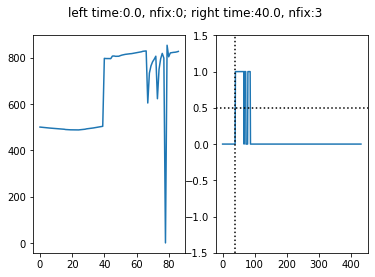

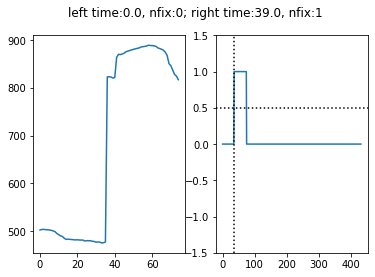

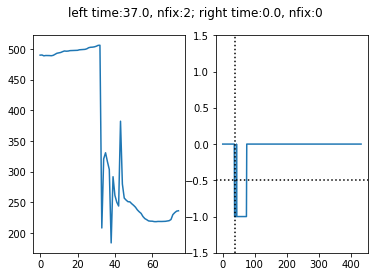

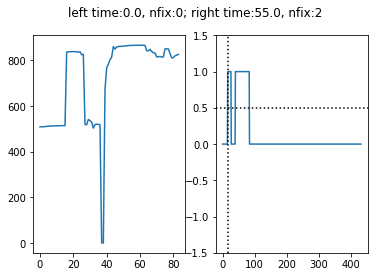

In [6]:
import itertools
import numpy as np

dm.fix1_roi = None  # first fixation
dm.fix1_time = None  # time to fixation
dm.nfix_left = 0  # number of fixations to the left
dm.nfix_right = 0  # number of fixations to the right
dm.time_left = None  #  gaze time to the left  fixation
dm.time_right = None  #  gaze time to the right  fixation
for row in dm:
    indices = np.where(row.roi != 0)[0]  # All indices for all non-0 ROIs
    if len(indices) == 0:
        continue
    first_index = indices[0]
    row.fix1_time = first_index
    row.fix1_roi = row.roi[first_index]
    row.time_left = sum(row.roi == -1)
    row.time_right = sum(row.roi == 1)
    for roi, _ in itertools.groupby(row.roi):
        if roi == -1:
            row.nfix_left += 1
        elif roi == 1:
            row.nfix_right += 1
            
    # A quick plot for visual inspection to see if things make sense;
    # each row of plots represents one trial
    # the left subplot shows all eye movements
    # the right subplot shows only those counting as fixations (right or left)
      
    plt.subplot(1, 2, 1)
    plt.plot(row.xtrace_trial)
    plt.subplot(1, 2, 2)
    plt.plot(row.roi)
    plt.ylim(-1.5, 1.5)
    plt.axvline(row.fix1_time, linestyle=':', color='black')
    plt.axhline(row.fix1_roi / 2, linestyle=':', color='black')
    plt.suptitle('left time:{}, nfix:{}; right time:{}, nfix:{}'.format(
        row.time_left,
        row.nfix_left,
        row.time_right, 
        row.nfix_right,
    ))
    plt.show()


## Explore the data
- print first two rows from the dm to see your variables and their values
- choose what you need
- create your subset by dropping any unnecessary variables

What do we need here? 
1. Subject number
2. Location of first fixation             (**fix1_roi**)
3. Time to fixation                       (**fix1_time**)
4. Fixations to the left                  (**nfix_left**)
5. Fixations to the right                 (**nfix_right**)
6. Duration of each fixation to the left  (**time_left**)
7. Duration of each fixation to the right (**time_right**)
8. Current Stimulus                       (portrait & words)
    

In [ ]:
# print first 2 rows
print(dm[1])

## If you want to inspect each variable before clearing them up
## uncomment the selected row(s) and press Cntl + /
# print(dm.fix1_roi)
# print(dm.fix1_time)
# print(dm.nfix_left)
# print(dm.nfix_right)
# print(dm.time_left)
# print(dm.time_right)

#clear the dataset - Keep only the variables you need
dm = ops.keep_only(dm, dm.subject_nr, dm.fix1_roi, dm.fix1_time, dm.nfix_left, dm.nfix_right, dm.time_left, dm.time_right,
                   dm.portrait_left, dm.portrait_right, dm.portrait_1, dm.portrait_2, dm.pair_1, dm.pair_2, dm.time_experiment)


## Write the dm to a csv/xlsx file

In [ ]:
# Write to disk 
io.writetxt(dm, 'ETG_subjs_long.csv') #all subjects in .csv

#io.writexlsx(dm, 'ETG_subjs.csv') #or if you prefer .xlsx